<a id='home'></a>
<img src="../img/BCTheme.png"><br>
<div style="text-align: right">
    <p style="text-align: right; font-size:16px; font-style: italic">Filipi Rigui</p>
    <a href="https://www.linkedin.com/in/filipirigui/"><img border="0" alt="LinkedIn" src="../img/in.png" width="32" height="32"></a>   
    <a href="https://github.com/fdrigui"><img border="0" alt="LinkedIn" src="../img/gh.png" width="32" height="32"></a>
</div><br>
<p><i>Para uma melhor imersão visual, abrir projeto no <b>Jupyter ou Google Colab</b></i></p>

  [ **Readme Módulo 02**](readme.md)<br>

| [Aula 02](Aula_02.ipynb) | [Aula 04](Aula_04.ipynb) |

<h1><b><span style="color:#5C0040">Aula 03:</span></b> Ticks, escalas e formatação de imagens</h1>

<a id='aula'></a>
________________________________
<h2><b><span style="color:#5C0040">Aula:</span></b></h2>

<h3><b><span style="color:#5C0040">Importação das bibliotecas</span></b></h3>

In [31]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

<h3><b><span style="color:#5C0040">Configurações do ambiente</span></b></h3>

In [32]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<h3><b><span style="color:#5C0040">Referência de módulos anteriores</span></b></h3>

In [33]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

dados = pd.read_csv(url, sep=';', parse_dates=['datahora'], infer_datetime_format='%Y-%m-%d',
                   usecols=['nome_munic','datahora','casos','casos_novos','obitos','obitos_novos'])

dados_sp = dados.query('nome_munic == "São Paulo"').copy()
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp['mes'] = pd.DatetimeIndex(dados_sp['datahora']).month

In [34]:
modelo = Prophet(growth='linear')

df = pd.DataFrame({'ds':dados_sp['datahora'][35:400],'y':dados_sp['casos_novos'][35:400]})
df_teste = pd.DataFrame({'ds':dados_sp['datahora'][400:],'y':dados_sp['casos_novos'][400:]})
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


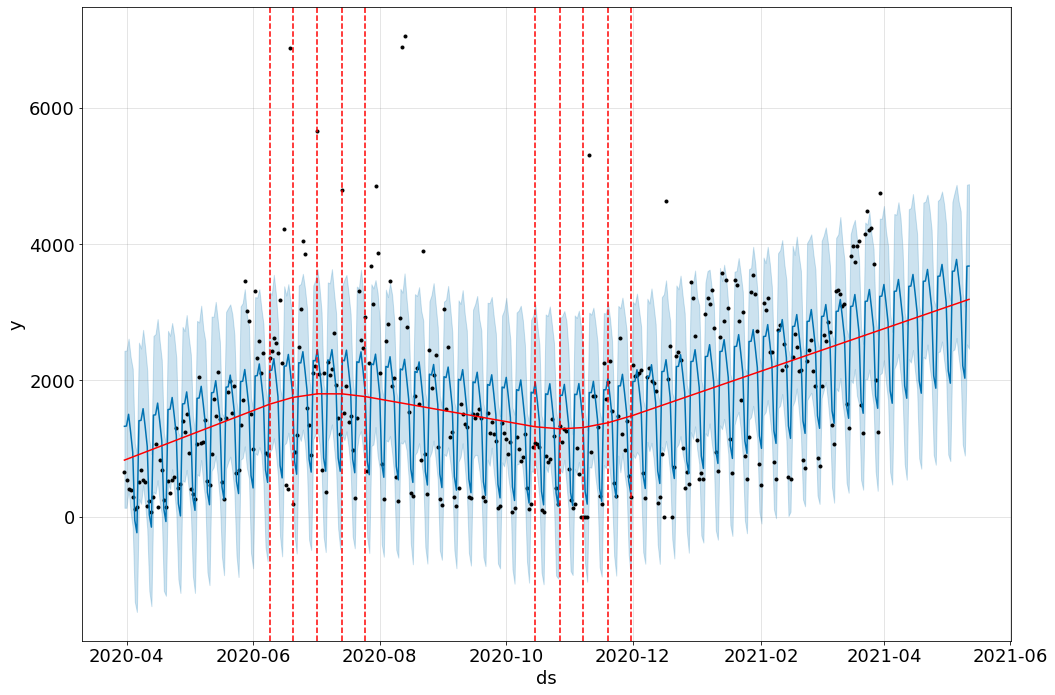

In [35]:
fig = modelo.plot(previsao, figsize=(15,10), )
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(growth='linear', changepoint_prior_scale=10, mcmc_samples=30)

df = pd.DataFrame({'ds':dados_sp['datahora'][35:400],'y':dados_sp['casos_novos'][35:400]})
df_teste = pd.DataFrame({'ds':dados_sp['datahora'][400:],'y':dados_sp['casos_novos'][400:]})
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(15,10), )
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<a id='desafios'></a>
____________________
<h2><b><span style="color:#5C0040">Desafio:</span></b></h2>

___________________________________________________
| [Home](#home) | [Aula 04](Aula_04.ipynb) |